In [1]:
#importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

Lets open up the data.


In [6]:
#importing the dataset
with open('../../data/chat/test.json') as content:
    data1 = json.load(content)

In [7]:
data1

{'intents': [{'tag': 'greeting',
   'input': ['hello',
    'hi there',
    'nice to meet you',
    "hi, is this is the pirate's organization",
    'any pirates here ?',
    'hi',
    'hey there',
    'hey',
    'hi there',
    'hi, nice to meet you',
    'hello there',
    'anyone there ?',
    'hello pirates',
    'knock knock'],
   'responses': ["Hi. Welcome to the world's largest pirate organization - The Strawhats",
    'Hey yo, do you need help ?',
    'welcome aboard, how may I help you ?',
    'ahoy!!',
    "Hi random person, what do'ya want ?",
    'Hello my friend, How can I help you ?',
    'Ha , Glad you showed up. How are you ?']},
  {'tag': 'goodbye',
   'input': ['Thank you',
    'Thanks',
    'Thanks for the info',
    'bye',
    'byr bro',
    'adios',
    'okay bye',
    'goodbye',
    'see you later',
    'i will catch you later',
    'i will catch up later',
    'okay i will see you later',
    'I will talk to you later',
    'will text you later',
    "bye bro, I'll

In [8]:
#getting all the data to lists
tags = []
inputs = []
responses={}
for intent in data1['intents']:
    responses[intent['tag']]=intent['responses']
    for lines in intent['input']:
        inputs.append(lines)
        tags.append(intent['tag'])

In [9]:
tags

['greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'howami',
 'howami',
 'howami',
 'howami',
 'howami',
 'howami',
 'howami',
 'howami',
 'whoareyou',
 'whoareyou',
 'whoareyou',
 'whoareyou',
 'whoareyou',
 'whoareyou',
 'whoareyou',
 'whoareyou',
 'whoareyou',
 'whereareyou',
 'whereareyou',
 'whereareyou',
 'whereareyou',
 'whereareyou',
 'whereareyou',
 'whereareyou',
 'whereareyou',
 'whereareyou',
 'whereareyou',
 'join',
 'join',
 'join',
 'join',
 'join',
 'join',
 'join',
 'join',
 'join',
 'join',
 'whereisthecenter',
 'whereisthecenter',
 'whereisthecenter',
 'whereisthecenter',
 'whereisthecenter',
 'prerequisites',
 'prerequisites',
 'prerequisites',
 'p

In [10]:
inputs

['hello',
 'hi there',
 'nice to meet you',
 "hi, is this is the pirate's organization",
 'any pirates here ?',
 'hi',
 'hey there',
 'hey',
 'hi there',
 'hi, nice to meet you',
 'hello there',
 'anyone there ?',
 'hello pirates',
 'knock knock',
 'Thank you',
 'Thanks',
 'Thanks for the info',
 'bye',
 'byr bro',
 'adios',
 'okay bye',
 'goodbye',
 'see you later',
 'i will catch you later',
 'i will catch up later',
 'okay i will see you later',
 'I will talk to you later',
 'will text you later',
 "bye bro, I'll talk to you later",
 'Bye brother',
 'how are you ?',
 'I am fine , how are you ?',
 'are you fine ?',
 'how are things going on ?',
 'everything going on okay ?',
 "how's everything there ?",
 "how's everything going on ?",
 'is everything okay ?',
 'who are you ?',
 'what are you ?',
 'what is your name ?',
 'are you a chatbot ?',
 'what can I call you ?',
 'your name ?',
 'are you a bot ?',
 'how do I address you ?',
 'How do I call you',
 'where are you from ?',
 'which

In [11]:
responses

{'greeting': ["Hi. Welcome to the world's largest pirate organization - The Strawhats",
  'Hey yo, do you need help ?',
  'welcome aboard, how may I help you ?',
  'ahoy!!',
  "Hi random person, what do'ya want ?",
  'Hello my friend, How can I help you ?',
  'Ha , Glad you showed up. How are you ?'],
 'goodbye': ['Okay, Bye',
  'Have a nice day',
  'Adios',
  'Goodbye',
  'see you later',
  'nice conversation. bye',
  'okay. Have a nice day',
  'Take care',
  "we'll meet soon",
  'Yeah Sure, Will talk to you later',
  'Okay , Take care'],
 'howami': ['Yeah , am fine',
  "Everything's going on well",
  'Doing good.Thanks you are my best friend',
  'Things are Great',
  'Yeah Fine, nothing much going on in my life',
  "I am Great , wanna join the pirate's organization ?",
  "Everything's great.",
  'I am doing good. Life is boring. need to go on an adventure'],
 'whoareyou': ['I am a The Great Pirate Bot , you can call me Going Merry',
  'I am Going Merry and you could ask me questions 

In [12]:
#converting to dataframe
data = pd.DataFrame({"inputs":inputs, "tags":tags})

In [13]:
data

,inputs,tags
0,hello,greeting
1,hi there,greeting
2,nice to meet you,greeting
3,"hi, is this is the pirate's organization",greeting
4,any pirates here ?,greeting
...,...,...
76,tell me more about the pre requisites,prerequisites
77,give more details about the pre-requisites,prerequisites
78,What are the requirements,prerequisites
79,what's the basic requirements,prerequisites


In [15]:
data = data.sample(frac=1)

In [16]:
data

,inputs,tags
1,hi there,greeting
51,where do you live in ?,whereareyou
29,Bye brother,goodbye
69,strawhat center's location ?,whereisthecenter
16,Thanks for the info,goodbye
...,...,...
78,What are the requirements,prerequisites
66,steps to join the pirates,join
32,are you fine ?,howami
27,will text you later,goodbye


In [18]:
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))


In [19]:
data

,inputs,tags
1,hi there,greeting
51,where do you live in,whereareyou
29,bye brother,goodbye
69,strawhat centers location,whereisthecenter
16,thanks for the info,goodbye
...,...,...
78,what are the requirements,prerequisites
66,steps to join the pirates,join
32,are you fine,howami
27,will text you later,goodbye


In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [23]:
input_shape = x_train.shape[1]
print(input_shape)

8


In [24]:
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  96
output length:  8


In [25]:

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model  = Model(i,x)

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 embedding (Embedding)       (None, 8, 10)             970       
                                                                 
 lstm (LSTM)                 (None, 8, 10)             840       
                                                                 
 flatten (Flatten)           (None, 80)                0         
                                                                 
 dense (Dense)               (None, 8)                 648       
                                                                 
Total params: 2,458
Trainable params: 2,458
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [28]:
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
3/3 [==============================] - 2s 5ms/step - loss: 2.0788 - accuracy: 0.1111
Epoch 2/200
3/3 [==============================] - 0s 4ms/step - loss: 2.0749 - accuracy: 0.2346
Epoch 3/200
3/3 [==============================] - 0s 4ms/step - loss: 2.0715 - accuracy: 0.3086
Epoch 4/200
3/3 [==============================] - 0s 4ms/step - loss: 2.0676 - accuracy: 0.2593
Epoch 5/200
3/3 [==============================] - 0s 3ms/step - loss: 2.0635 - accuracy: 0.2099
Epoch 6/200
3/3 [==============================] - 0s 4ms/step - loss: 2.0595 - accuracy: 0.2099
Epoch 7/200
3/3 [==============================] - 0s 4ms/step - loss: 2.0550 - accuracy: 0.2099
Epoch 8/200
3/3 [==============================] - 0s 4ms/step - loss: 2.0494 - accuracy: 0.1975
Epoch 9/200
3/3 [==============================] - 0s 4ms/step - loss: 2.0444 - accuracy: 0.2099
Epoch 10/200
3/3 [==============================] - 0s 4ms/step - loss: 2.0383 - accuracy: 0.2099
Epoch 11/200
3/3 [===========

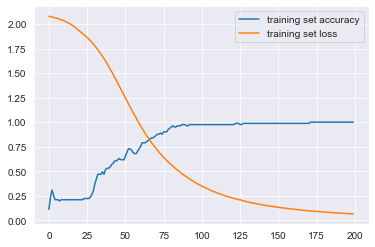

In [30]:
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()


In [34]:
import random


def predict(prediction_input):
    texts_p = []
    #removing punctuation and converting to lowercase
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)

    #tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)

    #getting output from model
    output = model.predict(prediction_input)
    output = output.argmax()

    #finding the right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    print("Going Merry : ",random.choice(responses[response_tag]))


In [35]:
predict("how are you")

Going Merry :  I am doing good. Life is boring. need to go on an adventure


In [36]:
predict("what is your name")

Going Merry :  I am a The Great Pirate Bot , you can call me Going Merry


In [37]:
predict("what is your age")

Going Merry :  I am a The Great Pirate Bot , you can call me Going Merry


In [39]:
predict("what is your profession")

Going Merry :  My name is Going Merry and I am here to answer your questions regarding our organization. go ahead and shoot


In [40]:
predict("what is your hobby")

Going Merry :  You can call me TechBot and I am here to Help you


In [41]:
predict("what is your favourite food")

Going Merry :  You can call me TechBot and I am here to Help you


In [42]:
predict("what is your favourite movie")

Going Merry :  Going Merry at your service


In [51]:
predict("Who are you?")
predict("Who are you?")
predict("Who are you?")
predict("Who are you?")
predict("Who are you?")


Going Merry :  I am Going Merry and you could ask me questions about our organization
Going Merry :  I am Going Merry and you could ask me questions about our organization
Going Merry :  I am Going Merry and you could ask me questions about our organization
Going Merry :  My name is Going Merry and yes, I am the G.O.A.T
Going Merry :  My name is Going Merry and yes, I am the G.O.A.T
